# Descriptive Statistics - Measures of Central Tendency and variability
Perform the following operations on any open source dataset (e.g., data.csv)
1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for
a dataset (age, income etc.) with numeric variables grouped by one of the qualitative
(categorical) variable. For example, if your categorical variable is age groups and
quantitative variable is income, then provide summary statistics of income grouped by
the age groups. Create a list that contains a numeric value for each response to the
categorical variable.
2. Write a Python program to display some basic statistical details like percentile, mean,
standard deviation etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-
versicolor' of iris.csv dataset.
Provide the codes with outnute and enlain everthing that you do in this sten

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [4]:
df=sns.load_dataset('iris')
# print(sns.get_dataset_names())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
def speciesdesc(species):
    df_new=df[df['species']==species]
    print("\n ",species ,"\n")
    print(df_new.describe().transpose())


In [9]:
arr=df['species']
arr=set(arr)
for i in arr:
    speciesdesc(i)


  setosa 

              count   mean       std  min  25%  50%    75%  max
sepal_length   50.0  5.006  0.352490  4.3  4.8  5.0  5.200  5.8
sepal_width    50.0  3.428  0.379064  2.3  3.2  3.4  3.675  4.4
petal_length   50.0  1.462  0.173664  1.0  1.4  1.5  1.575  1.9
petal_width    50.0  0.246  0.105386  0.1  0.2  0.2  0.300  0.6

  virginica 

              count   mean       std  min    25%   50%    75%  max
sepal_length   50.0  6.588  0.635880  4.9  6.225  6.50  6.900  7.9
sepal_width    50.0  2.974  0.322497  2.2  2.800  3.00  3.175  3.8
petal_length   50.0  5.552  0.551895  4.5  5.100  5.55  5.875  6.9
petal_width    50.0  2.026  0.274650  1.4  1.800  2.00  2.300  2.5

  versicolor 

              count   mean       std  min    25%   50%  75%  max
sepal_length   50.0  5.936  0.516171  4.9  5.600  5.90  6.3  7.0
sepal_width    50.0  2.770  0.313798  2.0  2.525  2.80  3.0  3.4
petal_length   50.0  4.260  0.469911  3.0  4.000  4.35  4.6  5.1
petal_width    50.0  1.326  0.197753  1.0 

In [10]:
df.groupby('species').describe().stack(level=0)

25%   50%    75%  count  max   mean  min       std
species                                                                      
setosa     petal_length  1.400  1.50  1.575   50.0  1.9  1.462  1.0  0.173664
           petal_width   0.200  0.20  0.300   50.0  0.6  0.246  0.1  0.105386
           sepal_length  4.800  5.00  5.200   50.0  5.8  5.006  4.3  0.352490
           sepal_width   3.200  3.40  3.675   50.0  4.4  3.428  2.3  0.379064
versicolor petal_length  4.000  4.35  4.600   50.0  5.1  4.260  3.0  0.469911
           petal_width   1.200  1.30  1.500   50.0  1.8  1.326  1.0  0.197753
           sepal_length  5.600  5.90  6.300   50.0  7.0  5.936  4.9  0.516171
           sepal_width   2.525  2.80  3.000   50.0  3.4  2.770  2.0  0.313798
virginica  petal_length  5.100  5.55  5.875   50.0  6.9  5.552  4.5  0.551895
           petal_width   1.800  2.00  2.300   50.0  2.5  2.026  1.4  0.274650
           sepal_length  6.225  6.50  6.900   50.0  7.9  6.588  4.9  0.635880
           sepal_width   2.800  3.00  3.175   50.0  3.8  2.974  2.2  0.322497

In [11]:
variety_describe=df.groupby('species').agg({
    'petal_length':['mean','median','min','max','std','count'],
    'petal_width':['mean','median','min','max','std','count'],
    'sepal_length':['mean','median','min','max','std','count'],
    'sepal_width':['mean','median','min','max','std','count'],
})
variety_describe

petal_length                                  petal_width         \
                   mean median  min  max       std count        mean median   
species                                                                       
setosa            1.462   1.50  1.0  1.9  0.173664    50       0.246    0.2   
versicolor        4.260   4.35  3.0  5.1  0.469911    50       1.326    1.3   
virginica         5.552   5.55  4.5  6.9  0.551895    50       2.026    2.0   

                      ... sepal_length                      sepal_width  \
            min  max  ...          min  max       std count        mean   
species               ...                                                 
setosa      0.1  0.6  ...          4.3  5.8  0.352490    50       3.428   
versicolor  1.0  1.8  ...          4.9  7.0  0.516171    50       2.770   
virginica   1.4  2.5  ...          4.9  7.9  0.635880    50       2.974   

                                             
           median  min  max       std count  
species                                      
setosa        3.4  2.3  4.4  0.379064    50  
versicolor    2.8  2.0  3.4  0.313798    50  
virginica     3.0  2.2  3.8  0.322497    50  

[3 rows x 24 columns]

<Axes: >

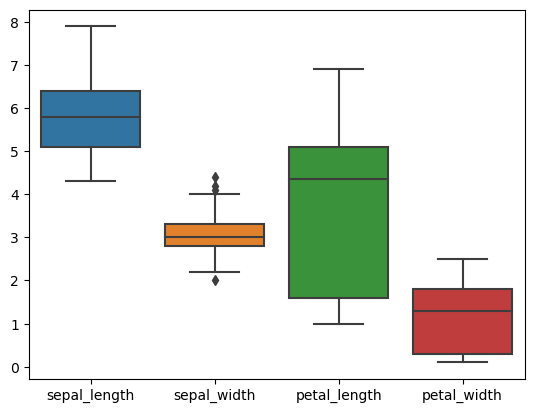

In [12]:
sns.boxplot(data=df)

# Age count and salary

In [2]:
age=[]
income=[]
for i in range(200):
    n=random.randint(18,60)
    age.append(n)
for i in range(200):
    n=random.randint(3000,60000)
    income.append(n)
data={
    'age':age,
    'income':income
}
df=pd.DataFrame(data)
df.head()

,age,income
0,32,25282
1,32,31197
2,47,28521
3,54,5785
4,49,14135


In [3]:
df['age'].mode()

0    42
Name: age, dtype: int64

In [4]:
df['age'].value_counts()

age
42    9
43    8
22    8
35    8
20    8
31    8
29    7
48    7
47    7
21    6
59    6
26    6
54    6
44    6
36    6
33    5
28    5
34    5
49    5
60    5
45    4
18    4
58    4
38    4
27    4
19    4
30    4
40    3
25    3
41    3
32    3
37    3
57    3
56    3
52    3
24    3
23    3
50    2
51    2
53    2
39    2
46    2
55    1
Name: count, dtype: int64

In [5]:
df.groupby('age').describe()

income                                                                    \
     count          mean           std      min       25%      50%       75%   
age                                                                            
18     4.0  23616.000000  13072.290975   6707.0  17515.25  25213.0  31313.75   
19     4.0  33545.750000  17712.387687  11854.0  23031.25  35730.5  46245.00   
20     8.0  38074.500000  19451.126592   3112.0  30279.00  44612.5  48565.25   
21     6.0  33780.500000  16106.004927   4449.0  32085.75  35969.5  41762.75   
22     8.0  29818.750000  17412.934878   3253.0  17709.50  32083.0  40096.50   
23     3.0  34577.333333  23129.362817  13378.0  22243.50  31109.0  45177.00   
24     3.0  34145.666667  19985.343663  18573.0  22878.00  27183.0  41932.00   
25     3.0  23296.000000  24472.634697   7416.0   9204.50  10993.0  31236.00   
26     6.0  32324.000000  22298.530678   5231.0  13800.75  35479.0  50341.25   
27     4.0  27415.250000  17454.344872   5619.0  19939.50  28134.5  35610.25   
28     5.0  33788.200000  23090.176974   5277.0  12538.00  47443.0  47977.00   
29     7.0  40459.285714  13056.268133  21507.0  31954.00  42063.0  50793.00   
30     4.0  42104.750000  25170.506290   4597.0  39070.00  53393.0  56427.75   
31     8.0  23872.875000  17503.081863   5370.0  11145.00  16988.0  40634.00   
32     3.0  26041.000000   4821.515633  21644.0  23463.00  25282.0  28239.50   
33     5.0  29894.400000  15705.693054   6578.0  25894.00  32662.0  34487.00   
34     5.0  34517.600000  12736.316002  17045.0  28582.00  36720.0  38850.00   
35     8.0  33466.250000  18745.615219   7432.0  17776.25  35657.0  49355.25   
36     6.0  34370.666667  14045.970905  15591.0  28587.75  32709.0  38364.75   
37     3.0  19091.666667  16464.242537   3582.0  10453.50  17325.0  26846.50   
38     4.0  24298.250000   7089.853190  16828.0  19276.75  24045.0  29066.50   
39     2.0  26064.000000  14180.319390  16037.0  21050.50  26064.0  31077.50   
40     3.0  37642.000000  15319.158299  19996.0  32696.50  45397.0  46465.00   
41     3.0  45678.666667  14755.580007  29816.0  39020.00  48224.0  53610.00   
42     9.0  37602.666667  14162.116747  13640.0  30935.00  33294.0  48207.00   
43     8.0  23475.375000  19026.869264   3035.0   3960.00  25209.0  33780.50   
44     6.0  24015.000000   5110.175065  16510.0  21844.25  24165.0  25850.50   
45     4.0  25964.500000  18528.333519   7510.0  17391.25  22368.0  30941.25   
46     2.0  54156.500000   1789.687263  52891.0  53523.75  54156.5  54789.25   
47     7.0  34130.857143  16773.287508   7138.0  26267.50  31199.0  45204.00   
48     7.0  42355.571429  19029.945786   8760.0  32944.00  52534.0  55580.50   
49     5.0  27375.200000  17071.499442  14135.0  14307.00  16379.0  44817.00   
50     2.0  30894.500000   1051.467784  30151.0  30522.75  30894.5  31266.25   
51     2.0  35031.000000  29545.749745  14139.0  24585.00  35031.0  45477.00   
52     3.0  24806.666667  20830.080301  10108.0  12888.00  15668.0  32156.00   
53     2.0  18661.500000   6886.512942  13792.0  16226.75  18661.5  21096.25   
54     6.0  28453.000000  22944.312385   4255.0  10154.00  24723.5  45599.75   
55     1.0  49265.000000           NaN  49265.0  49265.00  49265.0  49265.00   
56     3.0  31568.333333  23309.673900   5865.0  21684.00  37503.0  44420.00   
57     3.0  21335.666667  15559.940146  10591.0  12414.00  14237.0  26708.00   
58     4.0  26714.750000   8180.628434  19419.0  19741.50  26696.0  33669.25   
59     6.0  33041.166667  18751.894042   7731.0  19493.25  37024.0  43073.00   
60     5.0  21093.200000  11671.093316   3700.0  15823.00  23755.0  29165.00   

              
         max  
age           
18   37331.0  
19   50868.0  
20   58132.0  
21   51810.0  
22   55223.0  
23   59245.0  
24   56681.0  
25   51479.0  
26   55885.0  
27   47773.0  
28   55706.0  
29   54151.0  
30   57036.0  
31   47559.0  
32   31197.0  
33   49851.0  
34   51391.0  
35   55712.0  
36   577

In [16]:
bins=[18,20,30,40,50,60]
labels=['18-20','20-30','30-40','40-50','50-60']
df['filtered_age']=pd.cut(df['age'],bins=bins,labels=labels,right=False)
summary=df.groupby('filtered_age')['income'].agg(['mean','min','max','median','std','count'])
# summary=df.groupby('filtered_age')['income'].describe()
summary
# df[df['age']==30]

,mean,min,max,median,std,count
filtered_age,,,,,,
18-20,37526.833333,5423,50240,41897.5,13005.906021,12
20-30,34363.617021,5872,58289,34426.0,15727.310197,47
30-40,30685.538462,3550,59249,36043.0,18554.798578,39
40-50,33298.860000,4814,59628,31593.0,16905.570978,50
50-60,31848.836735,4048,59995,28297.0,16037.027132,49
